<a href="https://colab.research.google.com/github/sandeepjunaghare/llm/blob/main/Copy_of_cohere_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openai tiktoken cohere altair > /dev/null

In [ ]:
import cohere
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt

api_key = 'CPGMrh5QqBKJUO9XapUxa74OSNBYIvRf07X8AOJk'
co = cohere.Client(api_key)

In [ ]:
sentence1 = np.array(co.embed(["I like to be in my house"]).embeddings)
sentence2 = np.array(co.embed(["I enjoy staying at home"]).embeddings)
sentence3 = np.array(co.embed([" the isotop xxx decays to yyy"]).embeddings)


In [ ]:
print("embeddings for sentence1",sentence1)
print("embeddings for sentence2",sentence2)
print("embeddings for sentence3",sentence3)


embeddings for sentence1 [[-1.3671875  -0.53808594  0.05929565 ...  0.6064453  -0.28979492
   0.68408203]]
embeddings for sentence2 [[-1.0068359   1.84375     2.2558594  ...  0.20471191 -1.1230469
   0.72021484]]
embeddings for sentence3 [[-0.3876953  -0.8222656  -1.4824219  ... -0.7392578   0.6347656
  -0.48046875]]


# New Section

In [ ]:
from numpy import dot
print("print similarity between sentence 1 and sentence 2", dot(sentence1[0], sentence2[0]) )
print("print similarity between sentence 1 and sentence 3", dot(sentence1[0], sentence3[0]) )
print("print similarity between sentence 2 and sentence 3", dot(sentence2[0], sentence3[0]) )



print similarity between sentence 1 and sentence 2 6982.159696952578
print similarity between sentence 1 and sentence 3 53.756449225537786
print similarity between sentence 2 and sentence 3 136.6005987958573


In [ ]:
print("print similarity between sentence 1 and senence1", np.dot(sentence1[0], sentence2[0]))
print("print similarity between sentence 2 and senence 2", np.dot(sentence2[0], sentence2[0]))
print("print similarity between sentence 3 and senence 3", np.dot(sentence3[0], sentence3[0]))


print similarity between sentence 1 and senence1 6982.159696952578
print similarity between sentence 2 and senence 2 8750.065860697112
print similarity between sentence 3 and senence 3 6963.20484930115


In [ ]:
from  sklearn.metrics.pairwise import cosine_similarity
print ("print cosine similarity between sentence 1 and senence1", cosine_similarity(sentence1,sentence1)[0][0])
print ("print cosine similarity between sentence 2 and senence2", cosine_similarity(sentence2,sentence2)[0][0])
print ("print cosine similarity between sentence 3 and senence3", cosine_similarity(sentence3,sentence3)[0][0])


print cosine similarity between sentence 1 and senence1 1.000000000000001
print cosine similarity between sentence 2 and senence2 0.9999999999999999
print cosine similarity between sentence 3 and senence3 0.9999999999999988


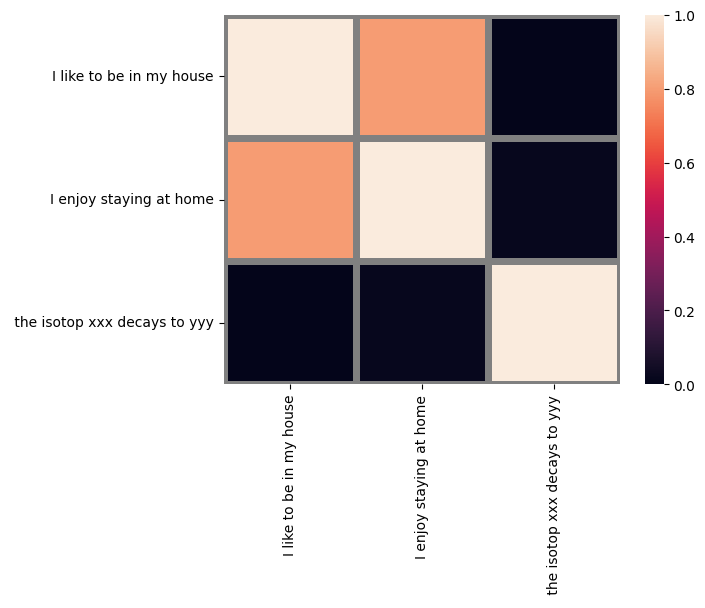

In [ ]:
embeddings = [sentence1,sentence2,sentence3]
dot_product_similarities = [[cosine_similarity(embeddings[i],embeddings[j])[0][0] for i in range(len(embeddings))] for j in range(len(embeddings))]
ax = sns.heatmap(dot_product_similarities, vmin=0,vmax=1,
                 linewidths=5,linecolor="grey",
                 xticklabels=["I like to be in my house", "I enjoy staying at home"," the isotop xxx decays to yyy"  ],
                 yticklabels=[ "I like to be in my house", "I enjoy staying at home"," the isotop xxx decays to yyy" ])